<a href="https://colab.research.google.com/github/chethanreddyhs/UTS_ML2019_ID13318555/blob/master/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Import modules

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import numpy as np
import os

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.style.use('seaborn')

# 2.Import data

In [0]:
os.getcwd()
os.chdir('/var')

In [8]:
print (os.listdir('/var'))

['run', 'tmp', 'cache', 'spool', 'opt', 'local', 'lock', 'backups', 'mail', 'log', 'lib', 'colab', 'test.csv', 'gender_submission.csv', 'train.csv']


In [9]:
df = pd.read_csv('train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Three ways to make a calculated field in Python**

We will make a new column called Survived_word, so that our visualizations make more sens

1. define function and call it with .apply method
2. with lambdas 
3. np.where function from numpy

In [0]:
#version 1 with def and .apply
def survived_to_words(row):
    if row.Survived == 1:
        value = "yes"
    elif row.Survived == 0:
        value = "no"
    else:
        value = "unkown"
    
    return value

df["Survived_word"] = df.apply(survived_to_words, axis=1)

In [0]:
#version 2 with lambda
df["Survived_word"] = df.Survived.apply(lambda row: "yes" if row == 1 else "no")

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_word
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,no


In [13]:
#version 3 with np.where
df["Survived_word"] = np.where(df.Survived == 1, "yes", "no")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_word
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,no


**We print the shape of our dataframe (rows, columns) and after that the amount of rows that have a value in each column**

In [14]:
print('shape is',df.shape, '\n')
print(df.count())

shape is (891, 13) 

PassengerId      891
Survived         891
Pclass           891
Name             891
Sex              891
Age              714
SibSp            891
Parch            891
Ticket           891
Fare             891
Cabin            204
Embarked         889
Survived_word    891
dtype: int64


# 3. Visualization pt 1

Lets make some visualizations get a better understanding of our data

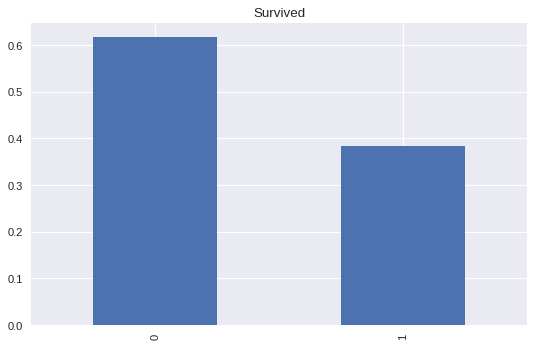

In [15]:
fig=plt.figure(figsize=(8, 5), dpi= 80, facecolor='w', edgecolor='k')

df.Survived.value_counts(normalize=True).plot(kind="bar")
plt.title("Survived")

plt.show()

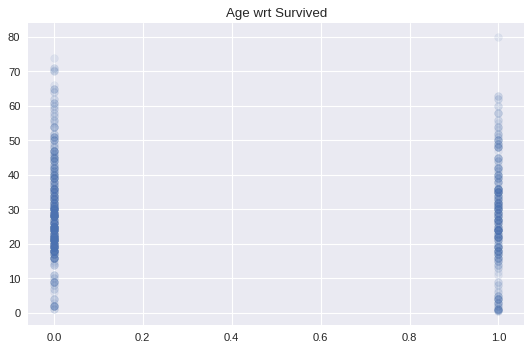

In [16]:
fig=plt.figure(figsize=(8, 5), dpi= 80, facecolor='w', edgecolor='k')

plt.scatter(df.Survived, df.Age, alpha=0.1)
plt.title("Age wrt Survived")

plt.show()

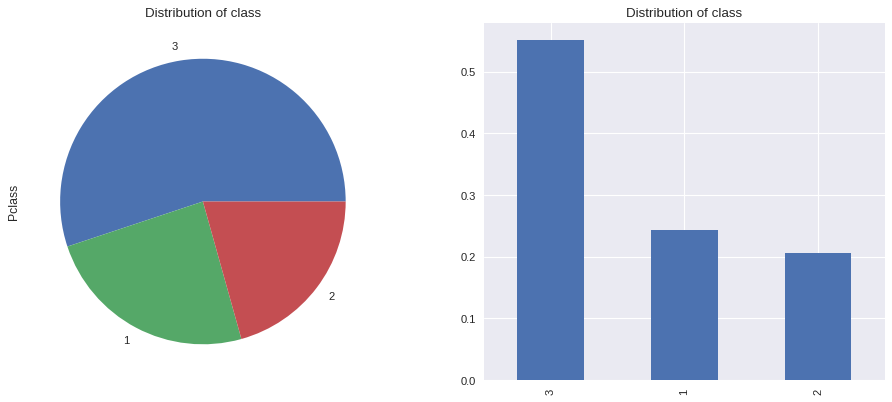

In [17]:
fig=plt.figure(figsize=(22, 13), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot2grid((2,3), (0,0))
df.Pclass.value_counts(normalize=True).plot(kind="pie")
plt.title("Distribution of class")

plt.subplot2grid((2,3), (0,1))
df.Pclass.value_counts(normalize=True).plot(kind="bar")
plt.title("Distribution of class")

plt.show()

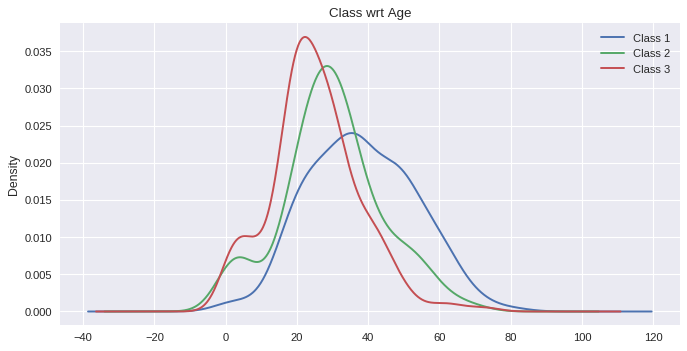

In [18]:
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')

for x in [1,2,3]:
    df.Age[df.Pclass == x].plot(kind="kde")
plt.title("Class wrt Age")
plt.legend(("Class 1", "Class 2", "Class 3"))

plt.show()

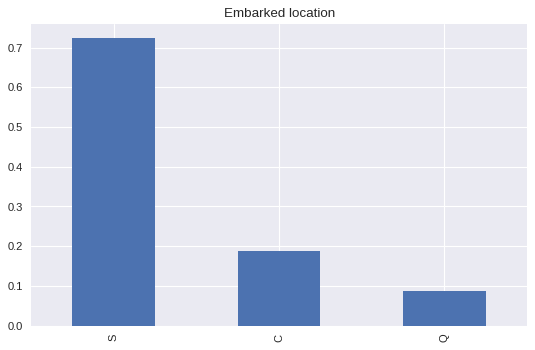

In [19]:
fig=plt.figure(figsize=(8, 5), dpi= 80, facecolor='w', edgecolor='k')

df.Embarked.value_counts(normalize=True).plot(kind="bar")
plt.title("Embarked location")

plt.show()


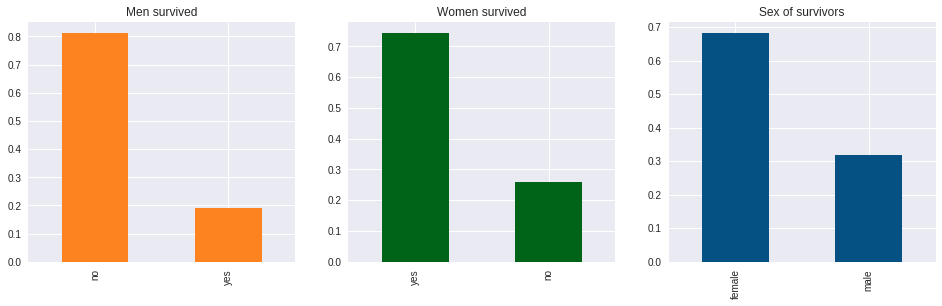

In [20]:
fig = plt.figure(figsize=(22,15))

plt.subplot2grid((3,4), (0,0))
df.Survived_word[df.Sex == "male"].value_counts(normalize=True).plot(kind="bar", color="#fc8320")
plt.title("Men survived")

plt.subplot2grid((3,4), (0,1))
df.Survived_word[df.Sex == "female"].value_counts(normalize=True).plot(kind="bar", color="#006418")
plt.title("Women survived")

plt.subplot2grid((3,4), (0,2))
df.Sex[df.Survived_word == "yes"].value_counts(normalize=True).plot(kind="bar", color="#065183")
plt.title("Sex of survivors")

plt.show()

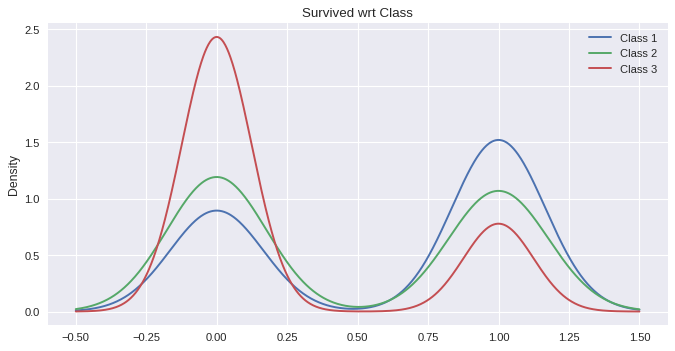

In [21]:
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')

for x in [1,2,3]:
    df.Survived[df.Pclass == x].plot(kind="kde")
plt.title("Survived wrt Class")
plt.legend(("Class 1", "Class 2", "Class 3"))

plt.show()

# 4. Visualization pt 2

**Now we understand our data by visualizing it, lets analyze it in more depth**

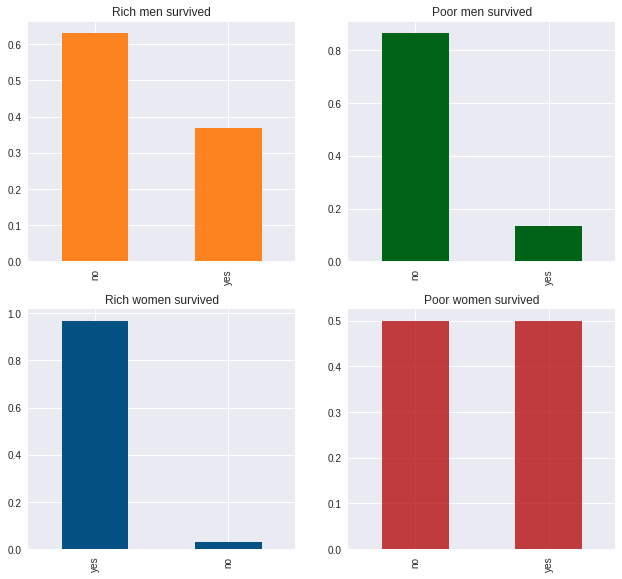

In [22]:
fig = plt.figure(figsize=(22,15))

plt.subplot2grid((3,4), (0,0))
df.Survived_word[(df.Sex == "male")  &  (df.Pclass == 1)].value_counts(normalize=True).plot(kind="bar", color="#fc8320")
plt.title("Rich men survived")

plt.subplot2grid((3,4), (0,1))
df.Survived_word[(df.Sex == "male")  &  (df.Pclass == 3)].value_counts(normalize=True).plot(kind="bar", color="#006418")
plt.title("Poor men survived")

plt.subplot2grid((3,4), (1,0))
df.Survived_word[(df.Sex == "female")  &  (df.Pclass == 1)].value_counts(normalize=True).plot(kind="bar", color="#065183")
plt.title("Rich women survived")

plt.subplot2grid((3,4), (1,1))
df.Survived_word[(df.Sex == "female")  &  (df.Pclass == 3)].value_counts(normalize=True).plot(kind="bar", color="#b30000", alpha=0.75)
plt.title("Poor women survived")
plt.show()

## 5. ML Models

Lets start to use some ML models on this data


First we start with some hypothesis which we found by visualizing our data (EDA)


1.   Gender is a good predictor for suvival, women will more likely survive.

2.   The higher the class (1 is high, 3 is low) the more likeley the person has survived
3.   Logically we can derive from the points above that a item rich women has almost always survived (97%).

Lets first use genderonly as the predictor for survival, as stated in the first hypothesis

In [23]:
train = df.copy()

train["Hypothesis"] = np.where(train.Sex == 'female', 1, 0)
train['Result'] = np.where(train.Hypothesis == train.Survived, 1, 0)

train.Result.value_counts(normalize=True)

1    0.786756
0    0.213244
Name: Result, dtype: float64

**Conclusion**: if we only use gender as a predictor, we already have a 79% accuracty, thats high!

But lets try to predict with actuall ML models like:

1.Logistic Regression

2.Polynomial

3.Random forest

4.XGBoost

5.Decision tree with cross validation


# 5.1 Feature engineering

Before we can use our ML models, we need to clean up our data (handle NaNs) and convert our categorical data

In [24]:
def clean_data(data):
    # Fill the empty rows of Fare and Age with their median
    data['Fare'] = data.Fare.fillna(data.Fare.dropna().median())
    data['Age'] = data.Age.fillna(data.Age.dropna().median())
    
    # Convert Sex column from words "Female" and "Male" to 0 and 1
    data["Sex"] = np.where(data.Sex == "male", 0, 1)
    
    # Fill NaNs of Embarked column and convert to integers
    data["Embarked"] = data["Embarked"].fillna("S")
    conditions = [data['Embarked'] == "S", 
                  data['Embarked'] == "C",
                  data['Embarked'] == "Q"]
    choices = [0, 1, 2]
    data["Embarked"] = np.select(conditions, choices, default = 0)

clean_data(train)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_word,Hypothesis,Result
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,no,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,yes,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,yes,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,yes,1,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,no,0,1


# 5.2 Logistic Regression Classifier

Since our dependent variable (Survived) is binary (0 or 1) we have to classify our data to these to outcomes. Logistic regression is one of the models we can use here to classify our data.

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [26]:
feature_columns = ['Pclass', 'Age', 'Sex', 'SibSp', 'Parch']

target = train.Survived.values
features = train[feature_columns].values

classifier = LogisticRegression(solver='lbfgs')
classifier_ = classifier.fit(features, target)

print("logistic regression accuracy =", classifier_.score(features, target))

print("logistic regression accuracy with cross validation = ", np.mean(cross_val_score(classifier, 
                                                                                        features, 
                                                                                        target, 
                                                                                        cv=10)))

logistic regression accuracy = 0.7912457912457912
logistic regression accuracy with cross validation =  0.7867617183066622


# 5.3 Polynomial

With logistic regression we assume that our data is linear, but it could be the case that some relations are second degree (polynomial). So lets try to fit a second degree relations between the features and the target variable.

In [0]:
from sklearn.preprocessing import PolynomialFeatures

In [28]:
poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(features)

classifier = LogisticRegression()
classifier_ = classifier.fit(poly_features, target)
print("accuracy with polynomial features =", classifier_.score(poly_features, target))

print("accuracy with polynomial features combined with cross validation =", 
      np.mean(cross_val_score(classifier, 
                               poly_features, 
                               target, 
                               cv=10)))

accuracy with polynomial features = 0.8305274971941639
accuracy with polynomial features combined with cross validation = 0.8227303938258995


# 5.4 Random forrest classifier

We can also try to attempt to fit our data with decision trees, not just one, but 100 of them. Basically we will use the mean of the accuracy of these 100 decision trees. The advantage of RF compared to a single decision tree is that we can anticipate on overfitting for a part.

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf_ = rf.fit(features, target)

print("accuracy with random forrest regressor =", rf_.score(features, target))

print("accuracy with random forrest regressor and cross validation =",
      np.mean(cross_val_score(rf, 
                               features, 
                               target, 
                               cv=10)))

accuracy with random forrest regressor = 0.9169472502805837
accuracy with random forrest regressor and cross validation = 0.8093720917035524


# 5.5 Decision tree with cross validation

In [30]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=1,
                                      max_depth=7,
                                      min_samples_split=2)

decision_tree_ = decision_tree.fit(features, target)

print("accuracy with decision tree =", decision_tree_.score(features, target))
print("accuracy with decision tree and cross validation =",
     np.mean(cross_val_score(decision_tree, features, target, cv=50)))

accuracy with decision tree = 0.8529741863075196
accuracy with decision tree and cross validation = 0.8039052287581699
